# **pyPRMS**
## PlotMapView Example
This example notebook demonstrates how to plot a map using a shapefile of the HRU's and parameter data.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pyPRMS.parfile import ParameterFile
from pyPRMS.plot import PlotMapView
import pyPRMS as prms


# Define a function to return the first n items of a dict
def take(n, iterable):
    """
    Return first n items of the iterable as a list
    """
    from itertools import islice
    if n is None:
        n = len(iterable)
    return list(islice(iterable, n))

Load the parameter file using the `ParameterFile` class so we can look at it's contents

In [2]:
datpth = os.path.join('..', 'data')
fname = os.path.join(datpth, 'puerto_rico', 'input', 'PRupdate.par')   
pf = ParameterFile(fname, verify=False)  # verify=False due to dprst_area missing from ValidParameters
take(5, pf.parameters)

['hru_up_id', 'hru_down_id', 'hru_strmseg_down_id', 'gw_pct_up', 'gw_up_id']

Create a PlotMapView object and plot out some parameter data

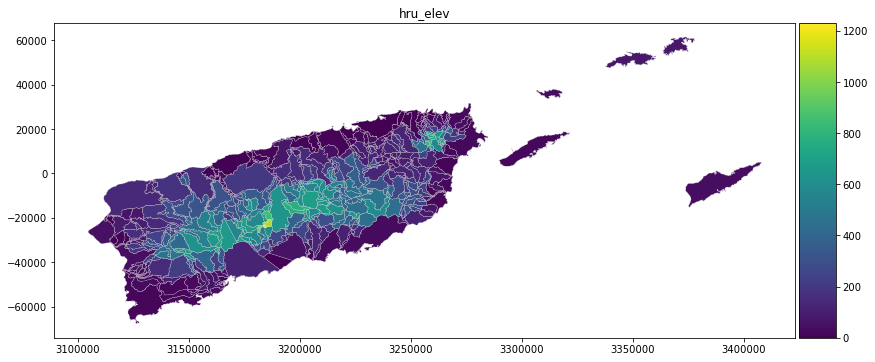

In [3]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, aspect='equal')

hrushp_f = os.path.join(datpth, 'puerto_rico', 'GIS', 'nhru.shp')
hru_id_col = 'hru_id_reg'

m = PlotMapView(pf, hrushp_f, hru_id_col=hru_id_col, ax=ax)

parname = 'hru_elev'

plt.title(parname)

pc = m.plot_parameter(parname, linewidth=.2, edgecolor='lightgrey', zorder=300, alpha=1.)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=.05)
fig.colorbar(pc, cax=cax)

plt.show()

Use the `idx` keyword argument to specify a list of HRUs to include in the plot

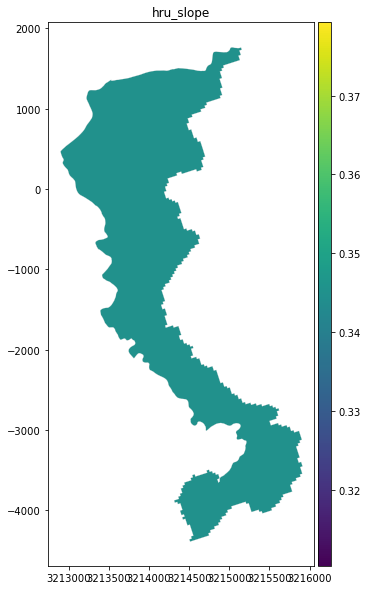

In [4]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, aspect='equal')

hrushp_f = os.path.join(datpth, 'puerto_rico', 'GIS', 'nhru.shp')
hru_id_col = 'hru_id_reg'

m = PlotMapView(pf, hrushp_f, hru_id_col=hru_id_col, ax=ax)

parname = 'hru_slope'

plt.title(parname)

hrulst = [413]
pc = m.plot_parameter(parname, idx=hrulst, linewidth=.2, edgecolor='lightgrey', zorder=300, alpha=1.)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=.05)
fig.colorbar(pc, cax=cax)

plt.show()